# CLUSTER PRODUCT INTO TYPES
--------------

## K-Means

* Compare product time series
  * Decompose the serie to reduce dimensionality
* Iterate over K values

----------
### Haar decomposition

In [1]:
import pywt
import pandas as pd

In [2]:
product = pd.read_pickle('./datasets/train_product_series.pkl')

In [3]:
product.head().T

,0,1,2,3,4
product_id,89,78,107,124,84
date,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
sessions,636,1006,836,1376,1090
bookings,2,3,5,5,5


In [12]:
test = pywt.dwt(product[product.product_id == 89].sort_values('date').sessions.tolist(),'haar')
product[product.product_id == 89].sort_values('date').sessions.tolist()[:5]

[636, 918, 1202, 1056, 1069]

In [10]:
?pywt.dwt

In [14]:
test[0][:5]

array([1098.84393796, 1596.64711192, 1707.66287657, 1383.100864  ,
       1677.25728497])

In [15]:
import seaborn as sns

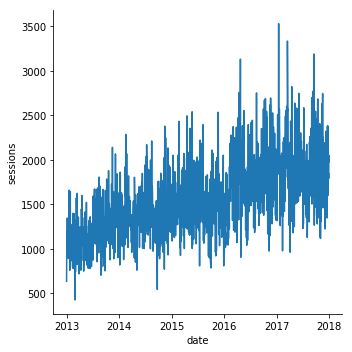

In [21]:
dt = product[product.product_id == 89].sort_values('date')
sns.relplot(data = dt , x = 'date', y = 'sessions', kind='line')

In [17]:
product[product.product_id == 89].sort_values('date')

,product_id,date,sessions,bookings
0,89,2013-01-01,636,2
199,89,2013-01-02,918,5
341,89,2013-01-03,1202,4
511,89,2013-01-04,1056,4
574,89,2013-01-05,1069,4
760,89,2013-01-06,1346,5
874,89,2013-01-07,1035,5
987,89,2013-01-08,921,2
1258,89,2013-01-09,1158,5
1306,89,2013-01-10,1214,8
